In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
all_xray_df = pd.read_csv('data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in glob(os.path.join('', 'data', 'images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df['Patient Age'] = all_xray_df['Patient Age'].map(lambda x: int(x))
all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
21999,00005830_000.png,No Finding,0,5830,41,F,PA,2048,2500,0.171,0.171,NaN,data/images_003/images/00005830_000.png
86732,00021381_034.png,Pneumothorax,34,21381,65,F,PA,2400,2789,0.143,0.143,NaN,data/images_010/images/00021381_034.png
95019,00024737_001.png,No Finding,1,24737,36,M,PA,2992,2991,0.143,0.143,NaN,data/images_011/images/00024737_001.png


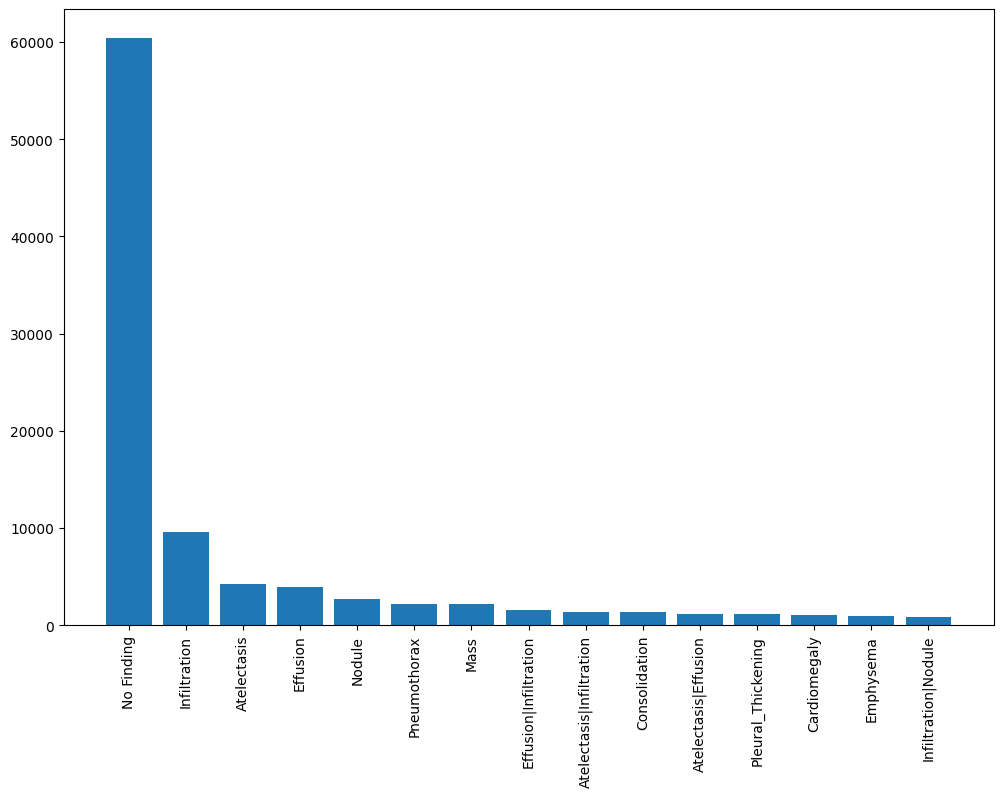

In [4]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)
plt.show()

In [5]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x) > 0]
print(f'All Labels ({len(all_labels)}): {all_labels}')
for c_label in all_labels:
    if len(c_label) > 1:
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (14): [np.str_('Atelectasis'), np.str_('Cardiomegaly'), np.str_('Consolidation'), np.str_('Edema'), np.str_('Effusion'), np.str_('Emphysema'), np.str_('Fibrosis'), np.str_('Hernia'), np.str_('Infiltration'), np.str_('Mass'), np.str_('Nodule'), np.str_('Pleural_Thickening'), np.str_('Pneumonia'), np.str_('Pneumothorax')]


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
104125,00027804_001.png,,1,27804,40,M,PA,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42777,00011018_000.png,,0,11018,45,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102484,00027310_000.png,,0,27310,71,F,PA,2544,3056,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print(f'Clean Labels ({len(all_labels)})', [(c_label, int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [(np.str_('Atelectasis'), 11559), (np.str_('Cardiomegaly'), 2776), (np.str_('Consolidation'), 4667), (np.str_('Edema'), 2303), (np.str_('Effusion'), 13317), (np.str_('Emphysema'), 2516), (np.str_('Fibrosis'), 1686), (np.str_('Infiltration'), 19894), (np.str_('Mass'), 5782), (np.str_('Nodule'), 6331), (np.str_('Pleural_Thickening'), 3385), (np.str_('Pneumonia'), 1431), (np.str_('Pneumothorax'), 5302)]


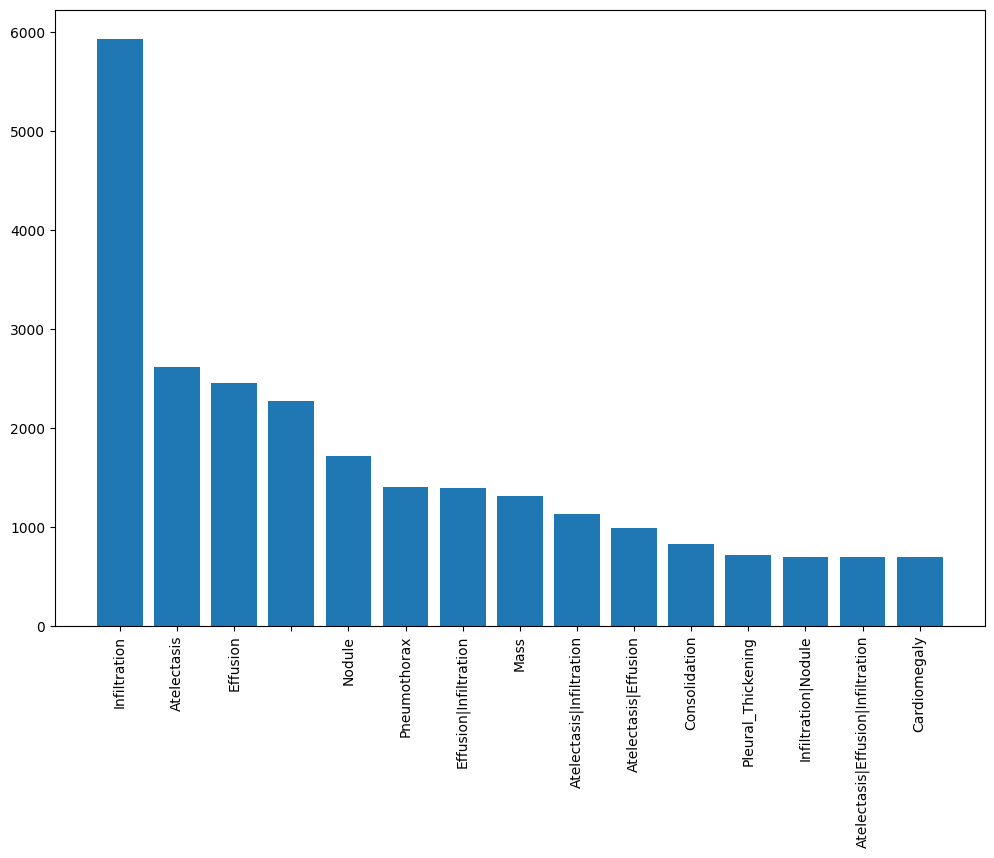

In [7]:
sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x) > 0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
all_xray_df = all_xray_df.sample(40000, weights=sample_weights)

label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1, = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)
plt.show()

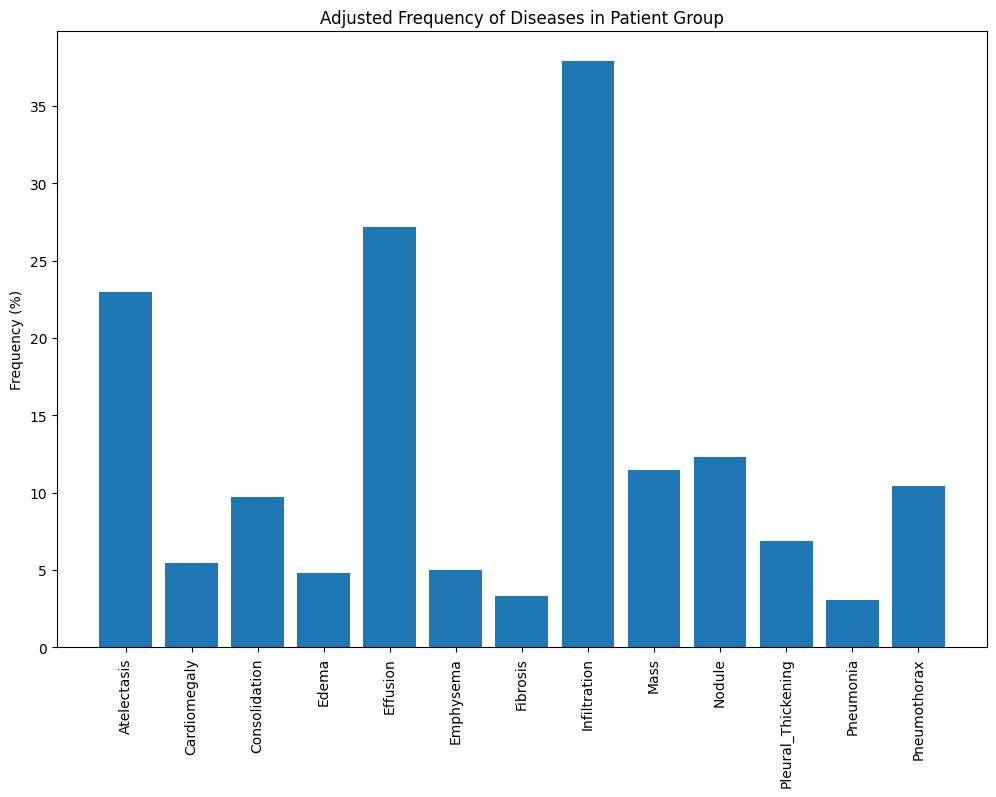

In [8]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')
plt.show()

In [9]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [10]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(all_xray_df, test_size = 0.25, random_state = 2018, stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 30000 validation 10000


In [33]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

IMG_SIZE = (128, 128)

# Original code using tensorflow keras
# core_idg = ImageDataGenerator(samplewise_center=True, 
#                               samplewise_std_normalization=True, 
#                               horizontal_flip = True, 
#                               vertical_flip = False, 
#                               height_shift_range= 0.05, 
#                               width_shift_range=0.1, 
#                               rotation_range=5, 
#                               shear_range = 0.1,
#                               fill_mode = 'reflect',
#                               zoom_range=0.15)

# Altered the above code with PyTorch

class StandardizePerImage:
    def __call__(self, img):
        img_array = np.array(img).astype(np.float32)

        if len(img_array.shape) == 2:
            img_array = img_array[:, :, np.newaxis]
        
        mean = img_array.mean()
        std = img_array.std()
        if std > 0:
            img_array = (img_array - mean) / std
            
        return torch.from_numpy(img_array.transpose((2, 0, 1)))

img_transformer = transforms.Compose([
    transforms.Resize(IMG_SIZE), # Resize imgs to IMG_SIZE
    transforms.RandomHorizontalFlip(), # Randomly flip images horizontally
    transforms.RandomAffine(
        degrees=5, # Randomly shift by up to 5 degrees
        translate=(0.1, 0.05), # Shift horizontally by 0.1, vertically by 0.05
        shear=10, 
        scale=(1.0-0.15, 1.0+0.15),
        fill=0
    ), 
    StandardizePerImage() # Call the above defined class to standardize each image
])

In [34]:
# Tensorflow Keras Version
# -----------
# def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
#     base_dir = os.path.dirname(in_df[path_col].values[0])
#     print(base_dir)
#     print('## Ignore next message from keras, values are replaced anyways')
#     df_gen = img_data_gen.flow_from_directory(base_dir, 
#                                      class_mode = 'sparse',
#                                     **dflow_args)
#     df_gen.filenames = in_df[path_col].values
#     df_gen.classes = np.stack(in_df[y_col].values)
#     df_gen.samples = in_df.shape[0]
#     df_gen.n = in_df.shape[0]
#     df_gen._set_index_array()
#     df_gen.directory = '' # since we have the full path
#     print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
#     return df_gen

# PyTorch Modified Version
class DataFrameDataset(Dataset):
    """PyTorch Dataset that loads images from paths in a DataFrame"""

    def __init__(self, dataframe, path_col, y_col, transform=None):
        """
        Args:
            dataframe: Pandas DataFrame with image paths and labels
            path_col: Name of column containing image paths
            y_col: Name of column containing labels
            transform: PyTorch transforms to apply to the images
        """
        self.dataframe = dataframe
        self.path_col = path_col
        self.y_col = y_col
        self.transform = transform
        self.image_paths = dataframe[path_col].values

        # Convert labels to tensors
        # First check what type the labels are
        if isinstance(dataframe[y_col].iloc[0], (list, np.ndarray)):
            # If they're lists or arrays, convert to tensor
            self.labels = [torch.tensor(np.array(label, dtype=np.float32), dtype=torch.float32) for label in dataframe[y_col]]
        else:
            # For scalar values
            self.labels = torch.tensor(dataframe[y_col].values, dtype=torch.float32)
            
        print(f'Created dataset with {len(self.dataframe)} images')

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L') # grayscale
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

def create_dataframe_loader(dataframe, path_col, y_col, transform, **dataloader_args):
    """
    Creates a DataLoader from a DataFrame.
    
    Args:
        dataframe: Pandas DataFrame with image paths and labels
        path_col: Name of column containing image paths
        y_col: Name of column containing labels
        transform: PyTorch transforms to apply to the images
        **dataloader_args: Arguments to pass to the DataLoader
        
    Returns:
        PyTorch DataLoader
    """
    dataset = DataFrameDataset(
        dataframe=dataframe,
        path_col=path_col,
        y_col=y_col,
        transform=transform
    )
    
    # Default arguments
    batch_size = dataloader_args.pop('batch_size', 32)
    shuffle = dataloader_args.pop('shuffle', True)
    num_workers = dataloader_args.pop('num_workers', 1)
    
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers,
        **dataloader_args
    )
    
    return dataloader

In [35]:
train_gen = create_dataframe_loader(
    dataframe=train_df,
    path_col='path',
    y_col='disease_vec',
    transform=img_transformer,
    batch_size=32,
    shuffle=True
)

valid_gen = create_dataframe_loader(
    dataframe=valid_df,
    path_col='path',
    y_col='disease_vec',
    transform=img_transformer,
    batch_size=256,
    shuffle=True
)

valid_loader = create_dataframe_loader(
    dataframe=valid_df,
    path_col='path',
    y_col='disease_vec',
    transform=img_transformer,
    batch_size=1024,
    shuffle=True
)

test_X, test_Y = next(iter(valid_loader))

Created dataset with 30000 images
Created dataset with 10000 images
Created dataset with 10000 images
